<a href="https://colab.research.google.com/github/salmaan-azam/Digit-Recognisor/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing Libraries
import keras
import tensorflow as tf

In [ ]:
# Downloading training and testing data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Checking dimensions of data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


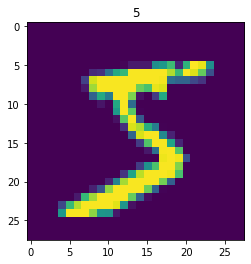

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(y_train[0])
plt.show()

In [ ]:
# Reshaping traing and testing data
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1 )
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1 )

In [ ]:
# Normalising training and testing data
x_train = x_train*1.0/255
x_test = x_test*1.0/255

In [ ]:
# One hot encoding of the outpul labels
from  keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test= np_utils.to_categorical(y_test, num_classes=10)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Checking dimensions of data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from keras import models

## Model Architecture

In [ ]:
he = keras.initializers.HeNormal()

In [ ]:
model = models.Sequential()
model.add(Conv2D(2, (3, 3), kernel_initializer=he, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(4, (3, 3), kernel_initializer=he, activation='relu'))
model.add(Conv2D(8, (3, 3), kernel_initializer=he, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), kernel_initializer=he, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), kernel_initializer=he, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 2)         20        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 4)         76        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 8)         296       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 8)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 11, 8)         32        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 16)          1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 9, 16)          6

In [ ]:
from keras.callbacks import ReduceLROnPlateau
lr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.2, min_lr=0.000001)

In [ ]:
from keras.callbacks import ModelCheckpoint
filename="/content/gdrive/MyDrive/Vision/MNIST/model1.hdf5"
checkpoint = ModelCheckpoint(filename, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

## Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
history = model.fit(datagen.flow(x_train, y_train), epochs=30, validation_data=(x_test, y_test), callbacks=[checkpoint, lr])

Epoch 1/30
1875/1875 [==============================] - 36s 11ms/step - loss: 0.7219 - accuracy: 0.7752 - val_loss: 0.0841 - val_accuracy: 0.9706

Epoch 00001: val_accuracy improved from -inf to 0.97060, saving model to /content/gdrive/MyDrive/Vision/MNIST/model1.hdf5
Epoch 2/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1687 - accuracy: 0.9475 - val_loss: 0.0479 - val_accuracy: 0.9841

Epoch 00002: val_accuracy improved from 0.97060 to 0.98410, saving model to /content/gdrive/MyDrive/Vision/MNIST/model1.hdf5
Epoch 3/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1126 - accuracy: 0.9650 - val_loss: 0.0370 - val_accuracy: 0.9882

Epoch 00003: val_accuracy improved from 0.98410 to 0.98820, saving model to /content/gdrive/MyDrive/Vision/MNIST/model1.hdf5
Epoch 4/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0994 - accuracy: 0.9691 - val_loss: 0.0410 - val_accuracy: 0.9876

Epoch 00004: val_accuracy did not improv

In [ ]:
saved_model = keras.models.load_model('/content/gdrive/MyDrive/Vision/MNIST/model1.hdf5')

In [ ]:
saved_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0194 - accuracy: 0.9942


[0.01941540464758873, 0.9941999912261963]